## **Análise de métricas de uma loja de varejo**

Uma loja de Varejo deseja criar algumas métricas de negócio para acompanhar os seus resultados.

A partir dos seguintes data sets: base de vendas e base de clientes, contruir as seguintes métricas:

- Departamentos mais vendidos
- Média de preço com frete por Nome de Departamento
- Quantidade de vendas por Mês
- Média de renda para cada tipo de canal de venda
- Média de idade de clientes por bandeira

### Premissas de negócio:

- Existe um erro de sistema, para compras sem UF, considere o Estado do MS
- Preço não pode ser maior que preço com frete



# 1. Importação das bibliotecas - Libraries import

In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

> Carregamento dos dados

In [ ]:
#Loading datasets
vendas = pd.read_excel("/content/sample_data/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
#Loading datasets
cliente = pd.read_excel("/content/sample_data/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


# 2. Dicionário - Dictionary
Descrição das colunas:

**Tabela 1: Vendas**

idcompra: Unique identifier of the sale.

idcanalvenda: Sales channel.

bandeira: Retail brand responsible for the sale.

Data: Sale date.

Preço: Sale price.

Preço_com_frete: Sale price with shipping included.

Nome_Departamento: Sales department related to the product.

estado: Customer's state.

cliente_Log: Unique identifier of the customer.

**Tabela 2: Cliente**

cliente_Log: Unique identifier of the customer.

idade: Age of the customer.

renda: Monthly income of the customer.



# 3. Análise Exploratória - Exploratory Analysis

>Visualzando informações resumidas do DataFrame, incluindo o tipo de dados e a contagem de valores não nulos de cada coluna:

In [ ]:
#Visualizing summarized information from the DataFrame, including the data type and the count of non-null values for each column.
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


>Contagem do número de ocorrências de cada valor da coluna idcanalvenda:

In [ ]:
#Counting the number of occurrences of each value in the column idcanalvenda
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


>Realizando a correção APP = Aplicativo:

In [ ]:
#Correcting APP = Application
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


>Contagem do número de ocorrências para cada valor da coluna bandeira:

In [ ]:
#Count the number of occurrences for each value in the bandeira column
vendas.groupby("bandeira").idcompra.nunique()

,idcompra
bandeira,
A,27679
B,38483


>Contagem do número de ocorrências para cada valor da coluna Nome_Departamento:

In [ ]:
#Count the number of occurrences for each value in the Nome_Departamento column
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


>Contagem do número de ocorrências para cada valor da coluna estado:

In [ ]:
#Count the number of occurrences for each value in the estado column
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


>Substituição de "" para "_" para os valores da coluna Nome_Departamento

In [ ]:
#Replacement of "" to "_" for the values in the Department_Name column.
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


>Contagem de nulos para a coluna estado

In [ ]:
#Contagem de nulos para a coluna estado
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


>Aplicando a regra de negócio de quando estado for igual a vazio, substituir por MS

In [ ]:
#Applying the business rule that when the column estado is empty, replace it with "MS"
vendas["estado"].fillna("MS", inplace=True)
vendas["estado"] = vendas["estado"].fillna("MS")

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


>Subtituindo os valores nulos da coluna Preço com a média da própria coluna

In [ ]:
#Replacing the null values in the Price column with the average of that same column.
media_preco = vendas["Preço"].mean()
#vendas["Preço"].fillna(media_preco, inplace = True)
vendas["Preço"]=vendas["Preço"].fillna(media_preco)

In [ ]:
media_preco

np.float64(906.5891285439033)

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


>Calculo da mediana da coluna Preço

In [ ]:
#Calculation of the median of the "Preço" column
mediana_preco = vendas["Preço"].median()
mediana_preco

532.448

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790


>Analisando estatisticamente as colunas Preço e Preço_com_frete

In [ ]:
#Analyzing statistically the columns "Preço" and "Preço_com_frete"
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


>Criando um novo conjunto de dados com a aplicação da regra de negócio de que o preço deve ser menor que o preço com frete.

In [ ]:
#Creating a new dataset with the application of the business rule that the price must be lower than the price with shipping.
preco_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço < Preço_com_frete")

>Descriçao estatística do novo dataset

In [ ]:
#Statistics description of the new dataset
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


>Averiguando o novo dataset com alguns filtros.

In [ ]:
#Checking the new dataset with some filters.
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


>Primeira métrica de negócio respondida: Departamento com maior quantidade de vendas.

In [ ]:
#First business metric answered: Department with the highest number of sales.
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


Segunda métrica de negócio respondida: Média de preço com frete por Departamento

In [ ]:
#2 Second business metric answered: Average price with shipping per Department
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


>Contagem de vendas por datas.

In [ ]:
#Sales count by dates.
vendas_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False)

,idcompra
Data,
2023-02-13,226
2023-01-20,218
2023-03-07,215
2023-03-30,214
2023-02-20,214
...,...
2023-02-15,162
2023-04-04,162
2023-02-25,161


>Criação de uma coluna com o mês de cada data para calcular a próxima métrica

In [ ]:
#Creation of a column with the month of each date to calculate the next metric.
vendas_correto["mes"] = vendas_correto["Data"].dt.month
vendas_correto.head()

<ipython-input-51-7c8346fa716f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["mes"] = vendas_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


>Terceira métrica de negócio respondida: Quantidade de vendas por Mês

In [ ]:
#Third business metric answered: Number of sales per month
vendas_correto.groupby("mes").idcompra.nunique().sort_values(ascending=False)

,idcompra
mes,
3,5590
4,5454
1,5309
2,5138


In [ ]:
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


>Descrição estatística das colunas idade e renda da base de clientes.

In [ ]:
#Statistical description of the age and income columns of the customer database.
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


>Transformação do tipo do dado da coluna renda de int para float.

In [ ]:
#Transformation of the data type of "renda" column from int to float.
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


>Join das colunas renda e idade da base de clientes para base de vendas.

In [ ]:
#Join the "renda" and "idade" columns from the customer database to the sales database.
vendas_cliente = vendas_correto.merge(cliente, how = "left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


>Quarta métrica de negócio: Média de renda para cada tipo de canal de venda

In [ ]:
#Fourth business metric: Average income for each type of sales channel
agg_idcanal_renda = vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index()
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.851376
1,Mobile,8222.717801
2,Internet,8211.844949


>Quinta métrica de negócio: Média de idade de clientes por bandeira

In [ ]:
#Fifth business metric: Average age of customers by brand
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


# 4. Visualização de Dados - Data Visualization

>Criação de gráfico representando a idade média por bandeira

Text(0.5, 1.0, 'Idade média por bandeira')

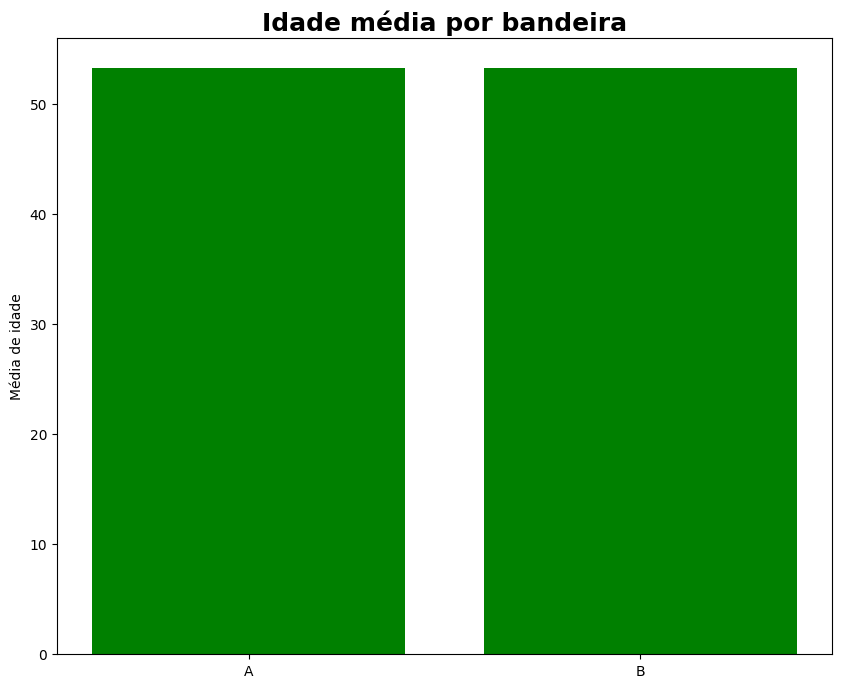

In [ ]:
#Creation of a chart representing the average age by flag
fig = plt.figure(figsize=(10,8))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")
plt.ylabel("Média de idade")
plt.title("Idade média por bandeira", loc="center", fontsize=18, fontweight="bold", color="black")

>Criação de gráfico representando a renda média por canal de venda

Text(0.5, 1.0, 'Renda média por canal de venda')

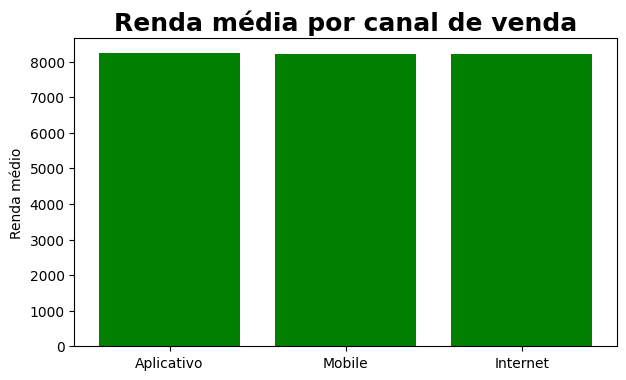

In [ ]:
#Creation of a graph representing the average income by sales channel
fig = plt.figure(figsize=(7,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")

plt.ylabel("Renda médio")

plt.title("Renda média por canal de venda", loc = "center", fontsize = 18, fontweight="bold", color="black")

>Criação de agrupamento com a contagem de vendas por data.

In [ ]:
#Creation of grouping with the count of sales by date.
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()

>Criação de gráfico para representar a quantidade de vendas ao longo do tempo.

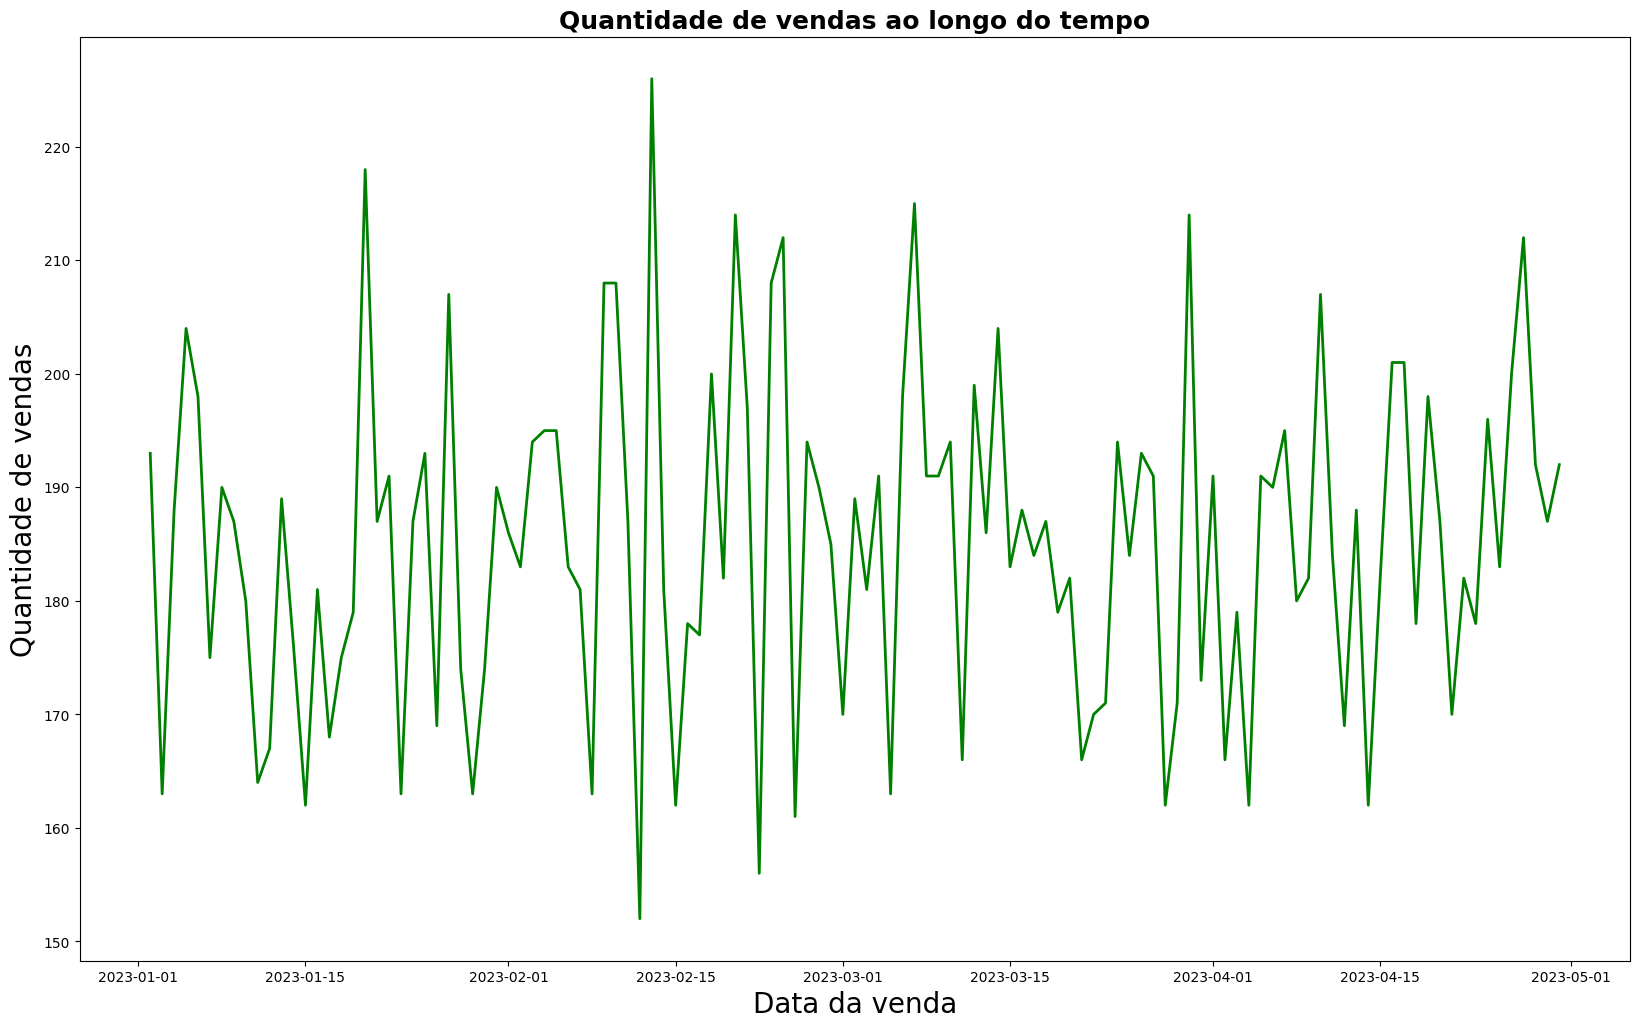

In [ ]:
#Creation of a chart to represent the quantity of sales over time.
fig = plt.figure(figsize=(20,12))
plt.xlabel("Data da venda", fontsize = 20)
plt.ylabel("Quantidade de vendas", fontsize = 20)
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x,y, color = "green", linewidth = "2")
plt.title("Quantidade de vendas ao longo do tempo", loc = "center", fontsize = 18, fontweight="bold", color="black")
plt.show()

>Criação de agrupamento com a média de preços por departamento, arredondando o preço pra duas casas decimais.

In [ ]:
#Creation of a grouping with the average prices by department, rounding the price to two decimal places.
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço
0,TVs_e_Acessorios,3279.38
1,Informatica,2106.80
2,Linha_Industrial,1948.70
3,Cine_e_Foto,1836.54
4,Eletrodomesticos,1376.82
5,Telefones_e_Celulares,1342.71
6,Esporte_e_Lazer,1093.12
7,Tablets,1057.56
8,Games,926.10
9,Instrumentos_Musicais,831.20


>Criação de gráfico com o preço médio por departamento

Text(0.5, 1.0, 'Preço médio por departamento')

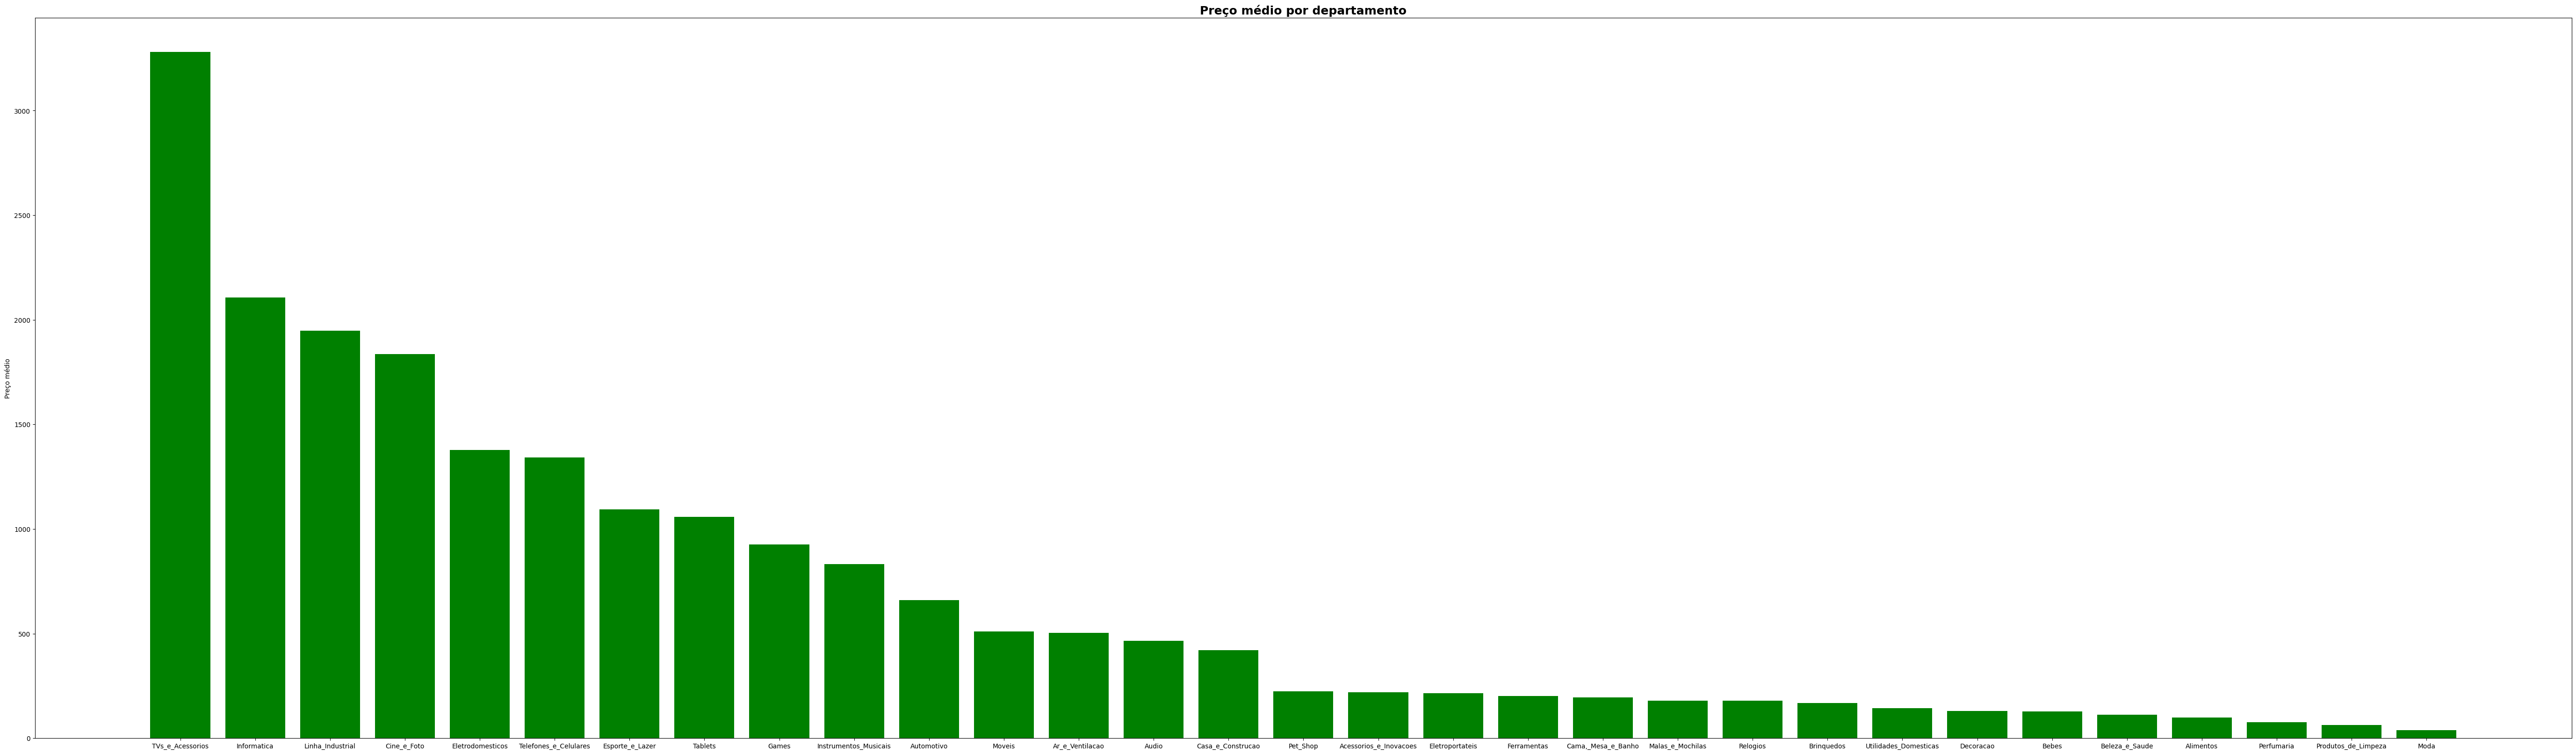

In [ ]:
#Creation of a chart with the average price by department
fig = plt.figure(figsize=(70,20))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço"], color="green")

plt.ylabel("Preço médio")

plt.title("Preço médio por departamento", loc = "center", fontsize = 18, fontweight="bold", color="black")

>Criação dos mesmos gráficos com a biblioteca plotly express

In [ ]:
#Creation of the same graphs with the plotly express library
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [ ]:
#Creating  bar graphs with the plotly express library
px.bar(agg_dept_preco, x = "Nome_Departamento", y = "Preço")

In [ ]:
#Creating  line graphs with the plotly express library
px.line(venda_por_data, x = "Data",y = "idcompra")

# 5. Encerramento - Closure

Esse é o final da análise de métricas de uma loja de varejo. Espero que tenha ficado claro todas as análises e visualizações utilizadas.

Obrigado por explorar esse notebook até o final, caso tenha algum feedback para compartilhar, ficaria muito feliz em ouvi-lo. Estou a disposição, entre em contato.

Atenciosamente, Bruno Paulillo.